## Import libraries and data

In [ ]:
import os
from pathlib import Path
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import statsmodels.api as sm 
import scipy.stats as stats
import pylab as py 

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
yulu_data = pd.read_csv('bike_sharing.txt')

In [ ]:
yulu_data.shape

(10886, 12)

In [ ]:
yulu_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## EDA

## Univariate Analysis

In [ ]:
yulu_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
yulu_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
yulu_data['datetime'] = pd.to_datetime(yulu_data['datetime'])
yulu_data['date'] = yulu_data['datetime'].dt.date
yulu_data['year'] = yulu_data['datetime'].dt.year
yulu_data['month'] = yulu_data['datetime'].dt.month
yulu_data['day'] = yulu_data['datetime'].dt.day
yulu_data['hour'] = yulu_data['datetime'].dt.hour
yulu_data['week'] = yulu_data['datetime'].dt.week

/tmp/ipykernel_16250/3721930838.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  yulu_data['week'] = yulu_data['datetime'].dt.week


In [ ]:
# 2 years of data
yulu_data['datetime'].min(), yulu_data['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [ ]:
yulu_data['date'].nunique()

456

In [ ]:
yulu_data.groupby(['season'])['date'].nunique()

season
1    114
2    114
3    114
4    114
Name: date, dtype: int64

In [ ]:
yulu_data.groupby(['holiday'])['date'].nunique()

holiday
0    443
1     13
Name: date, dtype: int64

In [ ]:
yulu_data.groupby(['workingday'])['date'].nunique()

workingday
0    145
1    311
Name: date, dtype: int64

In [ ]:
yulu_data.groupby(['weather'])['date'].nunique()

weather
1    434
2    346
3    187
4      1
Name: date, dtype: int64

In [ ]:
for col in ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']:
    print("column: ", col)
    display(yulu_data[col].describe(percentiles=[0.1,0.9]))
    print("=="*50)

column:  temp


count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
10%          9.84000
50%         20.50000
90%         30.34000
max         41.00000
Name: temp, dtype: float64

column:  atemp


count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
10%         12.120000
50%         24.240000
90%         34.090000
max         45.455000
Name: atemp, dtype: float64

column:  humidity


count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
10%         37.000000
50%         62.000000
90%         88.000000
max        100.000000
Name: humidity, dtype: float64

column:  windspeed


count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
10%          0.000000
50%         12.998000
90%         23.999400
max         56.996900
Name: windspeed, dtype: float64

column:  casual


count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
10%          1.000000
50%         17.000000
90%         94.000000
max        367.000000
Name: casual, dtype: float64

column:  registered


count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
10%          7.000000
50%        118.000000
90%        354.000000
max        886.000000
Name: registered, dtype: float64

column:  count


count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
10%          9.000000
50%        145.000000
90%        452.000000
max        977.000000
Name: count, dtype: float64

## Relationship with dependent variable: `count` (Bivariate Analysis)

<AxesSubplot: ylabel='count'>

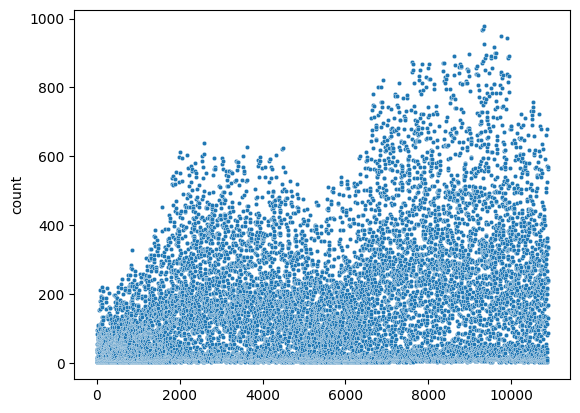

In [ ]:
sns.scatterplot(yulu_data['count'], s=10)

In [ ]:
random_date = np.random.choice(yulu_data['date'])
random_date

datetime.date(2011, 6, 10)

/tmp/ipykernel_16250/2179937167.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  sns.lineplot(yulu_data[yulu_data['date']==pd.Timestamp(random_date)].set_index('datetime')['count'], marker='o')


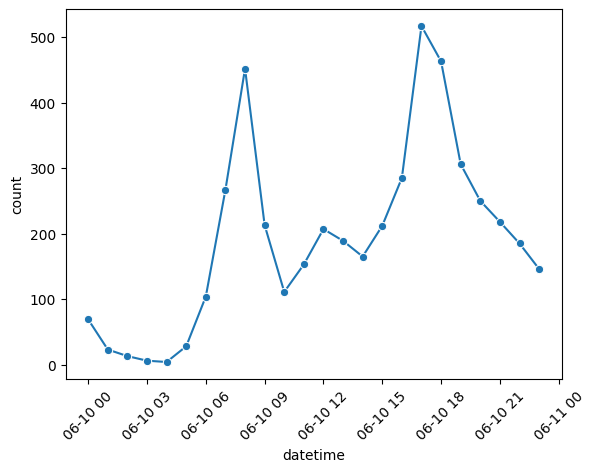

In [ ]:
sns.lineplot(yulu_data[yulu_data['date']==pd.Timestamp(random_date)].set_index('datetime')['count'], marker='o')
plt.xticks(rotation=45)
plt.show()

column: temp


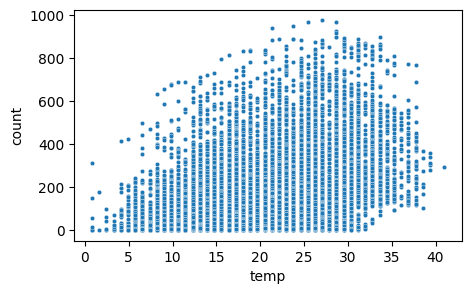

column: atemp


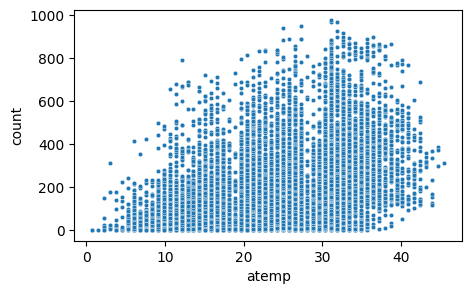

column: humidity


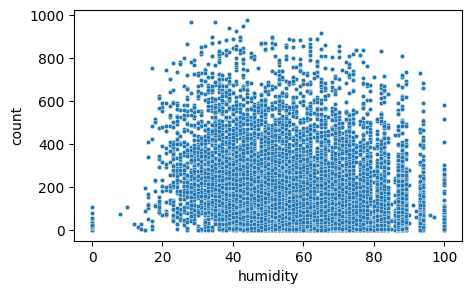

column: windspeed


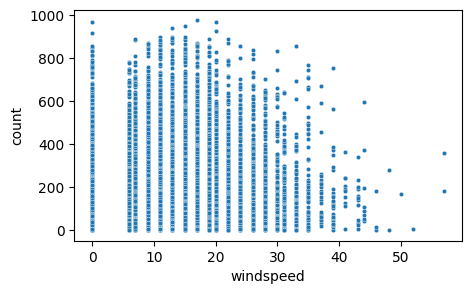

In [ ]:
for col in ['temp', 'atemp', 'humidity', 'windspeed']:
    print(f"column: {col}")
    plt.figure(figsize=(5,3))
    sns.scatterplot(yulu_data, x=col, y='count', s=10)
    plt.show()
    print("=="*50)

#### Drop columns with humidity==0

In [ ]:
yulu_data[yulu_data['humidity']==0].shape

(22, 18)

In [ ]:
yulu_data = yulu_data[yulu_data['humidity']!=0].reset_index(drop=True)

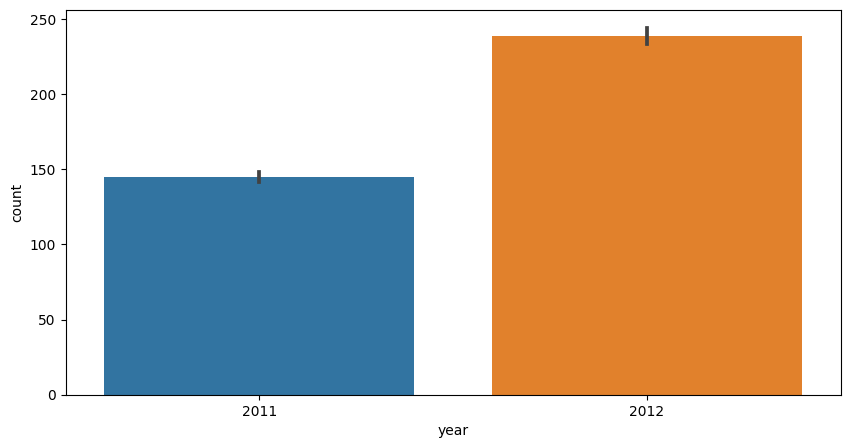

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(yulu_data, x='year', y='count')
plt.show()

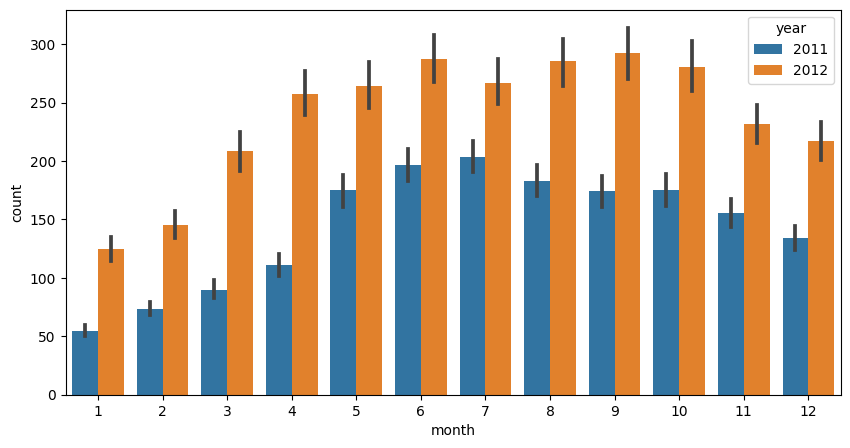

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(yulu_data, x='month', y='count', hue='year')
plt.show()

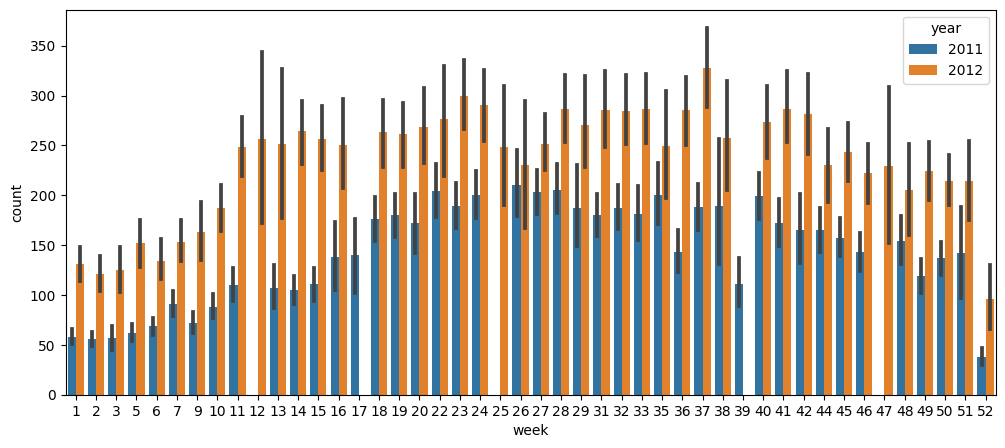

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(yulu_data, x='week', y='count', hue='year')
plt.show()

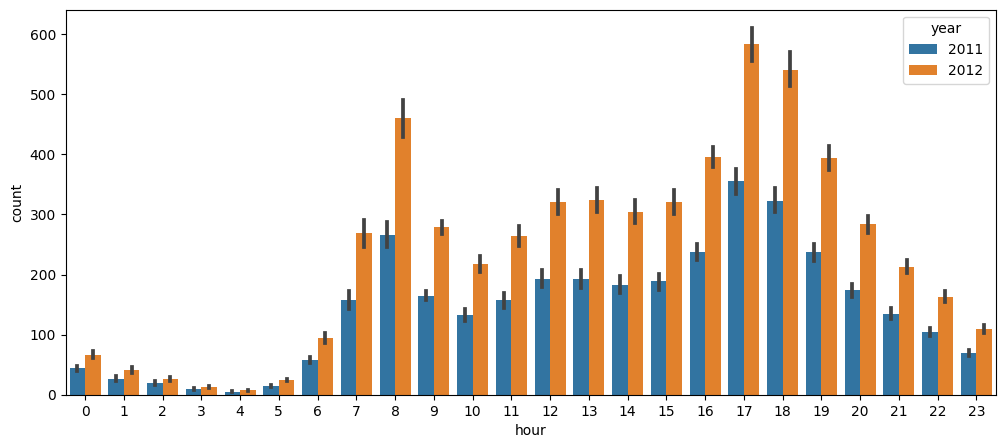

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(yulu_data, x='hour', y='count', hue='year')
plt.show()

In [ ]:
yulu_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'year', 'month', 'day', 'hour', 'week'],
      dtype='object')

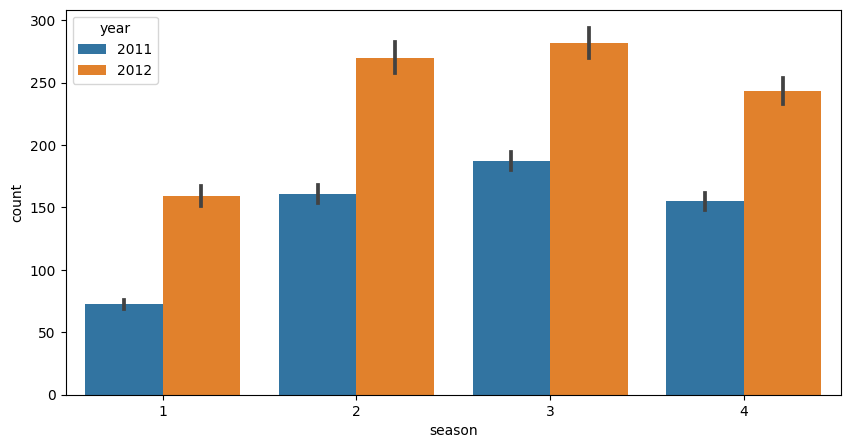

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(yulu_data, x='season', y='count', hue='year')
plt.show()

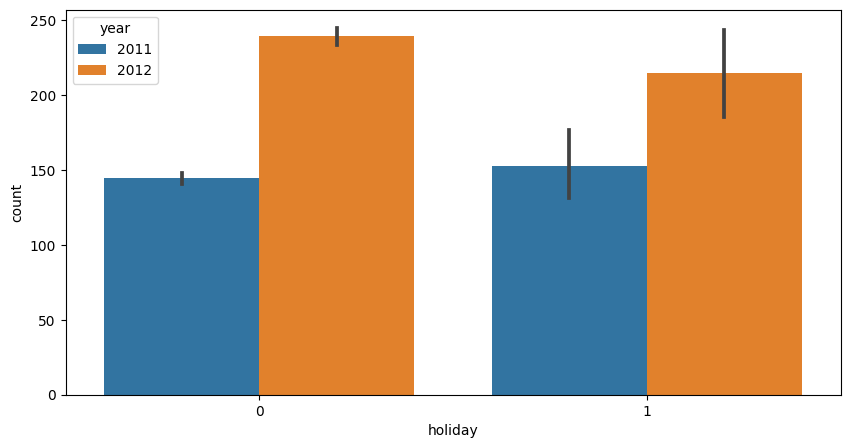

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(yulu_data, x='holiday', y='count', hue='year')
plt.show()

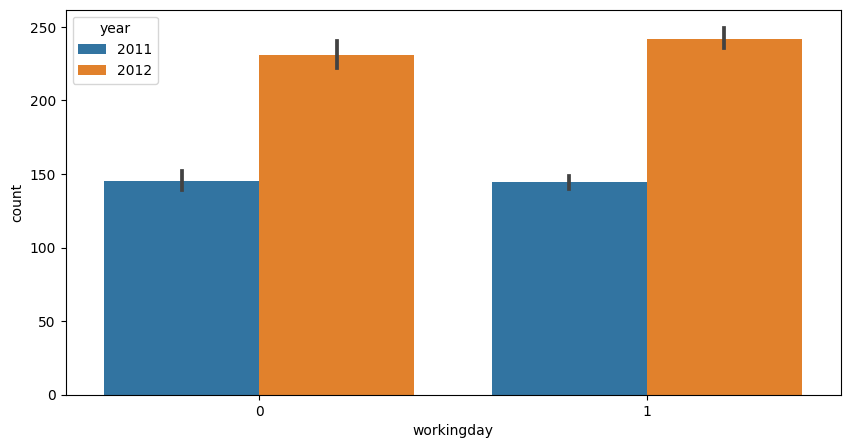

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(yulu_data, x='workingday', y='count', hue='year')
plt.show()

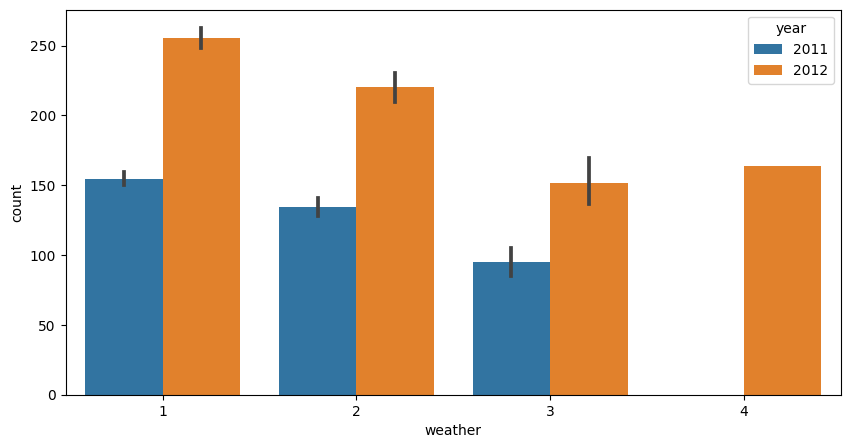

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(yulu_data, x='weather', y='count', hue='year')
plt.show()

In [ ]:
yulu_data.groupby("month")[['casual', 'registered']].mean().reset_index()

,month,casual,registered
0,1,8.203620,82.162896
1,2,10.318535,99.684795
2,3,28.452787,122.716724
3,4,43.798680,140.361936
4,5,45.268640,174.190789
5,6,53.260965,188.770833
6,7,55.862939,179.462719
7,8,50.296053,183.822368
8,9,50.496150,183.309131
9,10,41.807903,185.891328


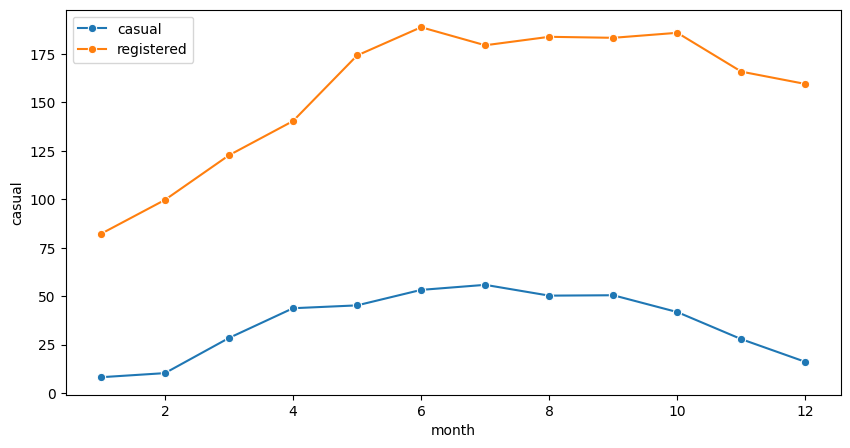

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(yulu_data.groupby("month")[['casual', 'registered']].mean().reset_index(), x='month', y='casual', marker='o', label="casual")
sns.lineplot(yulu_data.groupby("month")[['casual', 'registered']].mean().reset_index(), x='month', y='registered', marker='o', label="registered")
plt.show()

#### Numerical values (to quantify observations)

In [ ]:
yulu_data.groupby(['year'])['count'].mean()

year
2011    144.695556
2012    238.560944
Name: count, dtype: float64

In [ ]:
yulu_data[yulu_data['month'].isin([5,6,7,8])]['count'].mean(), yulu_data[~yulu_data['month'].isin([5,6,7,8])]['count'].mean()

(232.73382675438597, 171.26385809312637)

In [ ]:
yulu_data[yulu_data['hour'].isin([7,8,9,17,18,19])]['count'].mean(), yulu_data[~yulu_data['month'].isin([7,8,9,17,18,19])]['count'].mean()

(336.11294462779614, 177.61542245726233)

In [ ]:
tmp = yulu_data.groupby(['year', 'season']).agg({'count': 'mean'})
tmp["count_shift"] = tmp["count"].shift(1)
tmp["% increase"] = (tmp["count"]-tmp["count_shift"])/tmp["count"]*100
tmp[['count','% increase']].fillna(0)

count  % increase
year season                        
2011 1        72.642583    0.000000
     2       160.940746   54.863772
     3       186.994872   13.933070
     4       154.787125  -20.807769
2012 1       159.476889    2.940717
     2       269.601757   40.847237
     3       281.735380    4.306745
     4       243.189466  -15.850158

In [ ]:
yulu_data.groupby(['holiday'])['count'].mean().to_frame()

,count
holiday,
0,192.082346
1,185.877814


In [ ]:
yulu_data.groupby(['workingday'])['count'].mean().to_frame()

,count
workingday,
0,188.506621
1,193.502165


In [ ]:
yulu_data.groupby(['weather'])['count'].mean().to_frame()

,count
weather,
1,205.236791
2,179.030720
3,121.109654
4,164.000000


In [ ]:
yulu_data.groupby(['weather'])[['casual','registered','count']].mean()

,casual,registered,count
weather,,,
1,40.308676,164.928115,205.236791
2,30.805085,148.225636,179.030720
3,17.810489,103.299166,121.109654
4,6.000000,158.000000,164.000000


## Insights:

1. Is there an increase in rentals from 2011 to 2012? -> **An increase in rental counts: 144 to 232 from 2011 to 2012**
2. Are rental counts are high during certain months? -> **From months May to Aug, avg rental counts are 232, compared 170 for the rest of the year**
3. Is there an increased usage of rentals during certain hours of the day? -> **During morning and evenings hours, avg rental counts are 335 compared to 177 during the rest of hours**
4. Is there an increase in rentals during particular season of the year? -> **Rentals are high(40-60% increase usage) during summer, fall, and winter season than during spring season**
5. Is there an increase in rentals during holiday? -> No substantial increase
6. Is there an increase in rentals during working day? -> No substantial increase
7. Is there an increase in rentals during a particular weather? -> **Casual rentals are high(avg: 35) when the weather is clear and misty**

**All these intuitional insights can be validated using hypothesis testing**

## Understanding continuous variables

In [ ]:
random_date = np.random.choice(yulu_data['date'])
random_date

datetime.date(2012, 8, 7)

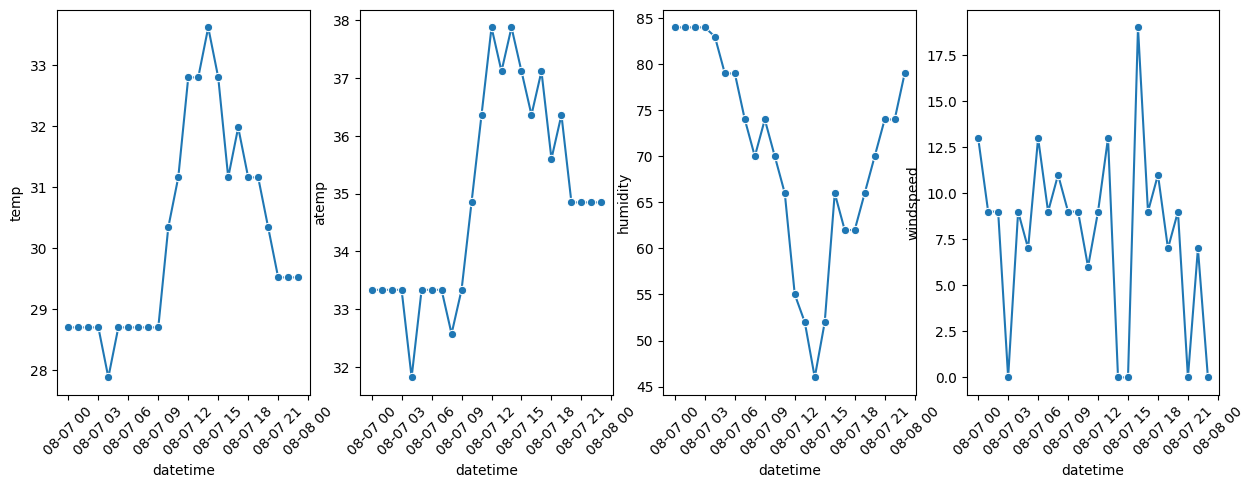

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['temp', 'atemp','humidity', 'windspeed']):
    # print(i+1, col)
    plt.subplot(1, 4, i+1)
    sns.lineplot(yulu_data[yulu_data['date']==random_date].set_index('datetime')[col], marker='o')
    plt.xticks(rotation=45)
plt.show()

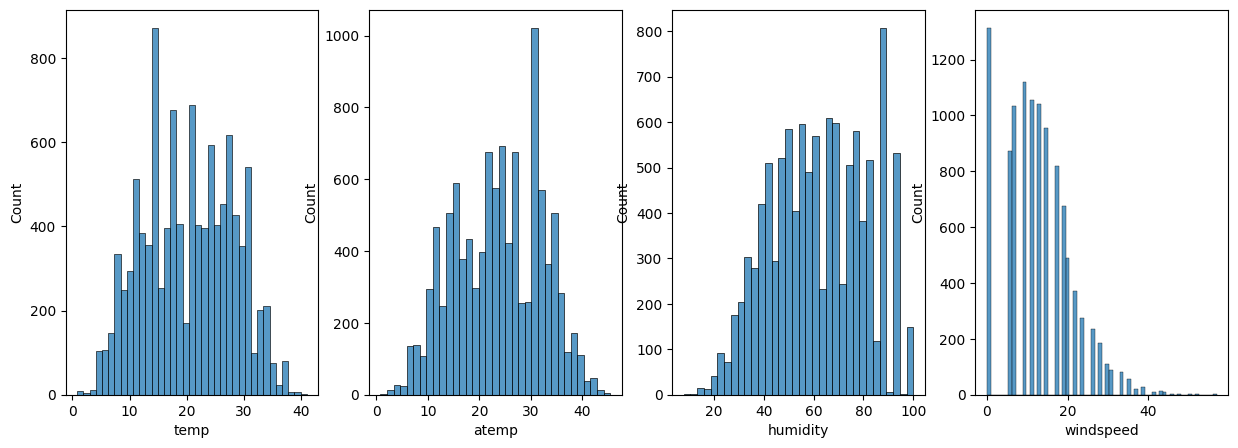

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['temp', 'atemp', 'humidity','windspeed']):
    # print(i+1, col)
    plt.subplot(1, 4, i+1)
    sns.histplot(data=yulu_data, x=col)
plt.show()

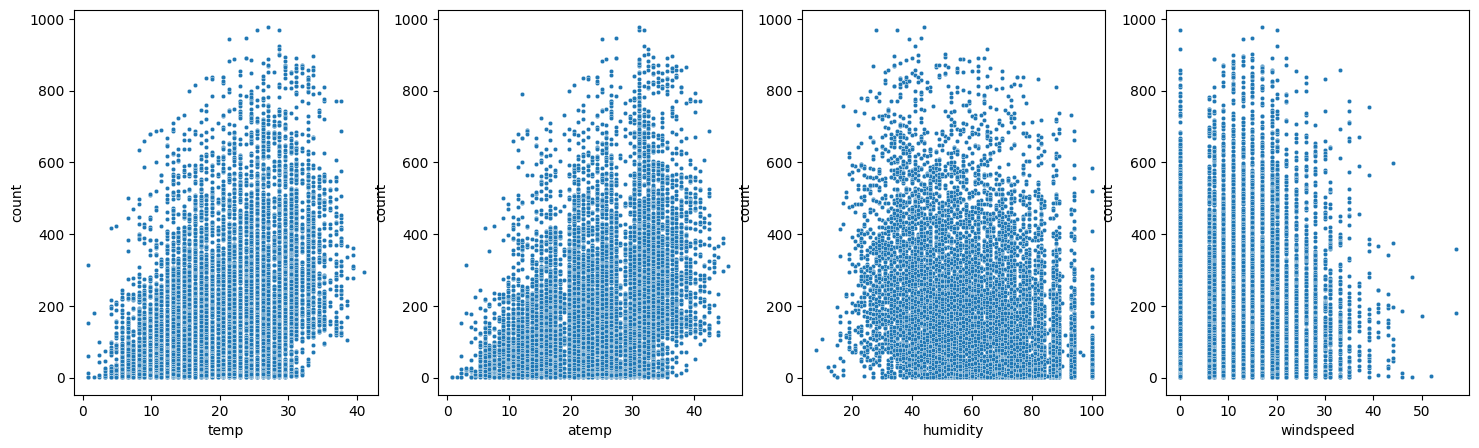

In [ ]:
plt.figure(figsize=(18, 5))
for i, col in enumerate(['temp', 'atemp', 'humidity', 'windspeed']):
    # print(f"column: {col}")
    plt.subplot(1, 4, i+1)
    sns.scatterplot(yulu_data, x=col, y='count', s=10)
plt.show()

## Hypothesis Testing

### Tests performed:

1. **QQ plots/Probability plots**
2. **Shapiro-Wilk Test**
3. **Levene Test**
4. **Anderson-Darling Test**
5. **Kolmogorov-Smirnoff Test**
6. **ANOVA**
7. **Chi-square Test**
8. **Mann-Whitney U Test**
9. **Kruskal-Willis H Test**

#### Let us understand significance and assumptions of each tests

1. **QQ plots/Probability plots**: A Q-Q (quantile-quantile) plot is a graphical tool used in statistics to assess whether a dataset follows a particular theoretical distribution. The Q-Q plot compares the quantiles of the observed data to the quantiles of a specified distribution.
2. **Shapiro-Wilk test**: The Shapiro-Wilk test is a statistical test used to assess whether a given sample comes from a normally distributed population. It is a popular test for normality, and it is particularly useful when dealing with smaller sample sizes.
3. **Anderson-Darling test**: The Anderson–Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution. In its basic form, the test assumes that there are no parameters to be estimated in the distribution being tested, in which case the test and its set of critical values is distribution-free. It is a modification of the Kolmogorov-Smirnov test and places more emphasis on the tails of the distribution.
4. **Kolmogorov-Smirnoff test**: The Kolmogorov-Smirnov (K-S) test is a ``non-parametric`` test used to assess whether a sample follows a specific distribution, typically the null hypothesis that it comes from a standard uniform distribution or another specified theoretical distribution. The K-S test is applicable to a wide range of distributional comparisons and is often used for testing the assumption of normality.
5. **Levene test**: The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
6. **ANOVA**: The significance of ANOVA lies in its ability to determine whether there are statistically significant differences in the means of three or more groups.
7. **Chi-square test**: Chi-Square test is a statistical test used to determine if there is a significant association between two ``categorical variables``. It is applicable when the data consists of counts or frequencies in different categories and is often used to analyze data in contingency tables.
8. **Mann-Whitney U test**: The Mann-Whitney U test, also known as the Wilcoxon rank-sum test, is a ``non-parametric test`` used to compare two independent groups when the dependent variable is ordinal or continuous but not normally distributed. It assesses whether there is a significant difference between the distributions of two independent samples. The test is often used as an alternative to the independent samples t-test when the assumptions of normality are violated.
9. **Kruskal-Wallis H test**: The Kruskal-Wallis H test is a ``non-parametric`` test used to determine if there are any statistically significant differences between three or more independent groups when the dependent variable is ordinal or continuous but not normally distributed. It is an extension of the Mann-Whitney U test for comparing more than two groups
10. **Fisher's Exact Test**
11. **Cramer's V**

In [ ]:
## significance level

In [ ]:
alpha = 0.05

## Hypothesis 1: Working Day has effect on number of electric cycles rented

**Ho: Working day does not have any effect on rentals** <br>
**Ha: Working day does have effect on rentals**

In [ ]:
yulu_data.groupby(['workingday']).agg({'count':['mean', 'median', 'count']})

count             
                  mean median count
workingday                         
0           188.506621  128.0  3474
1           193.502165  151.0  7390

In [ ]:
workingday_df = yulu_data[yulu_data['workingday']==1].copy().reset_index(drop=True)
non_workingday_df = yulu_data[yulu_data['workingday']==0].copy().reset_index(drop=True)

### QQ plots

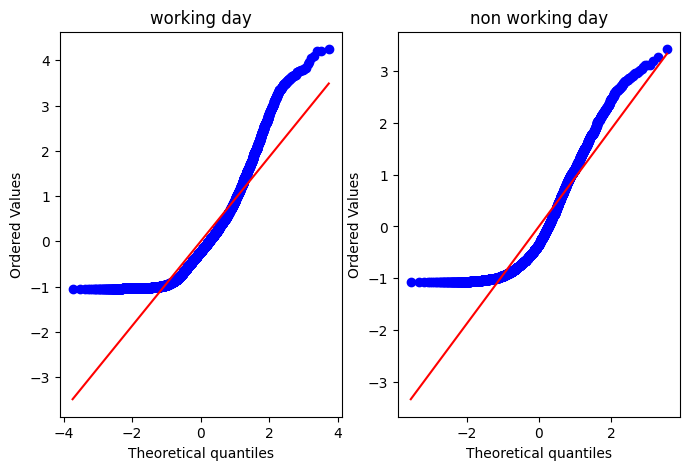

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
stats.probplot((workingday_df['count']-workingday_df['count'].mean())/workingday_df['count'].std(), dist="norm", plot=py)
plt.title("working day")

plt.subplot(1,2,2)
stats.probplot((non_workingday_df['count']-non_workingday_df['count'].mean())/non_workingday_df['count'].std(), dist="norm", plot=py)
plt.title("non working day")
py.show()

#### Insights: Distributions do not follow normal distribution

**We cannot use two sampled T-test since the normality is not followed**

**Since QQ plots show us, the samples do not follow normal distribution, I will skip other normality tests**

**In the cases, QQ plots gave us confidence about normality, we can bolster our claim by using the below tests to determine normality**

#### We can use any of the following tests for normality:

1. Shapiro-Wilk
2. Anderson-Darling
3. Kolmogorov-Smirnoff

### Levene Test

In [ ]:
# standardizing the data before performing test
res = stats.levene((workingday_df['count']-workingday_df['count'].mean())/workingday_df['count'].std(),
                   (non_workingday_df['count']-non_workingday_df['count'].mean())/non_workingday_df['count'].std(),
                   center='mean')
# res.statistic, res.pvalue
print('test statistic: ', res.statistic)
if res.pvalue < alpha:
    print("we reject null hypothesis, -> samples do not have equal variances")
else:
    print("we accept null hypothesis, -> samples have equal variances")

test statistic:  23.173008405967
we reject null hypothesis, -> samples do not have equal variances


#### Insights: It can be sensitive to distributions which do not follow normality

### Mann-Whitney U Test

In [ ]:
res = stats.mannwhitneyu(workingday_df['count'],
                         non_workingday_df['count'],
                         alternative='two-sided'
                        )
print(f"mann whitney test \n   1. test statistic: {res.statistic}\n   2. p value: {res.pvalue}")
test_statistic = res.statistic
p_value = res.pvalue
if p_value < alpha:
    print("we reject null hypothesis, distributions are not same")
else:
    print("we accept null hypothesis, distribution are same")
print("=="*100)

mann whitney test 
   1. test statistic: 12855953.5
   2. p value: 0.898106954713987
we accept null hypothesis, distribution are same


#### Insights: Working day has no effect on bike rentals

## Hypothesis 2: No. of cycles rented are similar in different seasons

**Ho: No of cycles rented are same in different seasons** <br>
**Ha: No of cycles rented are different in different seasons**

In [ ]:
yulu_data.groupby(['season']).agg({'count':['mean', 'median']})

count       
              mean median
season                   
1       117.070195   79.0
2       215.251372  172.0
3       234.417124  195.0
4       198.988296  161.0

In [ ]:
spring_data = yulu_data[yulu_data['season']==1].copy().reset_index(drop=True)
summer_data = yulu_data[yulu_data['season']==2].copy().reset_index(drop=True)
fall_data = yulu_data[yulu_data['season']==3].copy().reset_index(drop=True)
winter_data = yulu_data[yulu_data['season']==4].copy().reset_index(drop=True)

print(spring_data.shape, summer_data.shape, fall_data.shape, winter_data.shape)

(2664, 18) (2733, 18) (2733, 18) (2734, 18)


### QQ plots

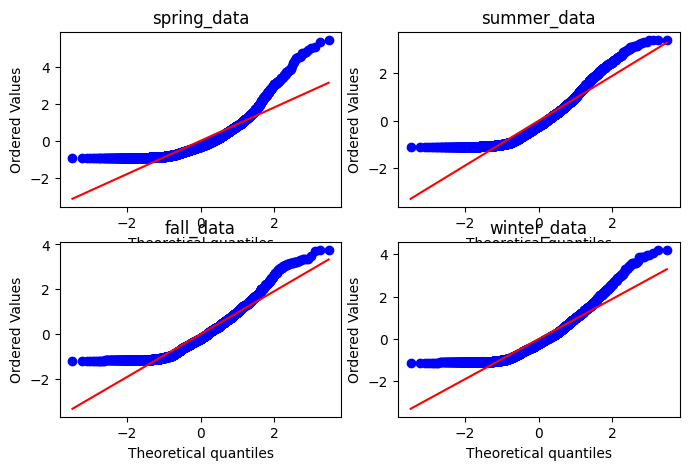

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(2,2,1)
stats.probplot((spring_data['count']-spring_data['count'].mean())/spring_data['count'].std(), dist="norm", plot=py)
plt.title("spring_data")

plt.subplot(2,2,2)
stats.probplot((summer_data['count']-summer_data['count'].mean())/summer_data['count'].std(), dist="norm", plot=py)
plt.title("summer_data")

plt.subplot(2,2,3)
stats.probplot((fall_data['count']-fall_data['count'].mean())/fall_data['count'].std(), dist="norm", plot=py)
plt.title("fall_data")

plt.subplot(2,2,4)
stats.probplot((winter_data['count']-winter_data['count'].mean())/winter_data['count'].std(), dist="norm", plot=py)
plt.title("winter_data")
py.show()

#### Insights: Distributions do not follow normal distribution

#### We cannot use Mann-Whitney U Test since it compares only two independent groups, we will use an extension of the test i.e. Kruskal-Wallis H Test

### Kruskal-Wallis H Test

In [ ]:
res = stats.kruskal(spring_data['count'],
                    summer_data['count'],
                    fall_data['count'],
                    winter_data['count']
                    )
print(f"kruskal wallis h test \n   1. test statistic: {res.statistic}\n   2. p value: {res.pvalue}")
test_statistic = res.statistic
p_value = res.pvalue
if p_value < alpha:
    print("we reject null hypothesis, samples' distributions are not same")
else:
    print("we accept null hypothesis, samples' distribution are same")
print("=="*100)

kruskal wallis h test 
   1. test statistic: 683.7552982442343
   2. p value: 6.98952539470282e-148
we reject null hypothesis, samples' distributions are not same


#### Insights: Bikes rentals are different during different seasons

## Hypothesis 3: No. of cycles rented are similar in different weather

**Ho: No of cycles rented are same in different weather** <br>
**Ha: No of cycles rented are different in different weather**

In [ ]:
yulu_data.groupby(['weather']).agg({'count':['mean', 'median']})

count       
               mean median
weather                   
1        205.236791  161.0
2        179.030720  134.0
3        121.109654   75.0
4        164.000000  164.0

In [ ]:
clear_data = yulu_data[yulu_data['weather']==1].copy().reset_index(drop=True)
cloudy_data = yulu_data[yulu_data['weather']==2].copy().reset_index(drop=True)
rainy_data = yulu_data[yulu_data['weather']==3].copy().reset_index(drop=True)
stormy_data = yulu_data[yulu_data['weather']==4].copy().reset_index(drop=True)

print(clear_data.shape, cloudy_data.shape, rainy_data.shape, stormy_data.shape)

(7192, 18) (2832, 18) (839, 18) (1, 18)


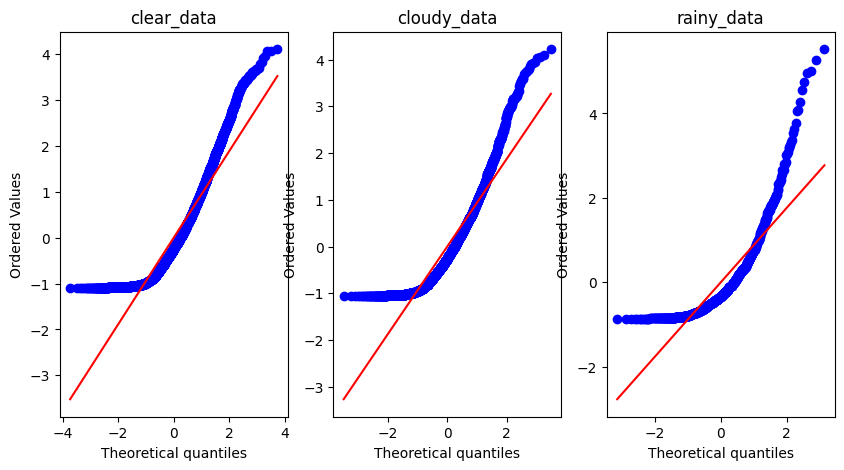

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
stats.probplot((clear_data['count']-clear_data['count'].mean())/clear_data['count'].std(), dist="norm", plot=py)
plt.title("clear_data")

plt.subplot(1,3,2)
stats.probplot((cloudy_data['count']-cloudy_data['count'].mean())/cloudy_data['count'].std(), dist="norm", plot=py)
plt.title("cloudy_data")

plt.subplot(1,3,3)
stats.probplot((rainy_data['count']-rainy_data['count'].mean())/rainy_data['count'].std(), dist="norm", plot=py)
plt.title("rainy_data")

py.show()

#### Insights: Distributions do not follow normal distribution

### Kruskal-Wallis H Test

In [ ]:
res = stats.kruskal(clear_data['count'],
                    cloudy_data['count'],
                    rainy_data['count']
                    )
print(f"kruskal wallis h test \n   1. test statistic: {res.statistic}\n   2. p value: {res.pvalue}")
test_statistic = res.statistic
p_value = res.pvalue
if p_value < alpha:
    print("we reject null hypothesis, samples' distributions are not same")
else:
    print("we accept null hypothesis, samples' distribution are same")
print("=="*100)

kruskal wallis h test 
   1. test statistic: 188.76467195433247
   2. p value: 1.0239347824645635e-41
we reject null hypothesis, samples' distributions are not same


#### Insights: Bikes rentals are different during different weather

## Hypothesis 4: Weather is dependent on season (check between 2 predictor variable)

**Ho: Weather is independent of season** <br>
**Ha: Weather is dependent on season**

In [ ]:
yulu_data['weather'].value_counts(normalize=True), yulu_data['season'].value_counts(normalize=True)

(1    0.662003
 2    0.260677
 3    0.077228
 4    0.000092
 Name: weather, dtype: float64,
 4    0.251657
 2    0.251565
 3    0.251565
 1    0.245214
 Name: season, dtype: float64)

In [ ]:
yulu_data[['weather', 'season']].corr()

,weather,season
weather,1.000000,0.015426
season,0.015426,1.000000


**For categorical variables, we can use Chi-square tests to check for independence**

In [ ]:
res = stats.chisquare(yulu_data['weather'],
                      yulu_data['season']
                     )
print(f"chi square test \n   1. test statistic: {res.statistic}\n   2. p value: {res.pvalue}")
test_statistic = res.statistic
p_value = res.pvalue
if p_value < alpha:
    print("we reject null hypothesis, distributions are dependent")
else:
    print("we accept null hypothesis, distribution are independent")
print("=="*100)

chi square test 
   1. test statistic: 9965.916666666668
   2. p value: 0.9999999998046497
we accept null hypothesis, distribution are independent


#### Insights: Weather is independent of season

## Hypothesis 5: Is there an increase in rentals from 2011 to 2012?

**Ho: No increase in rentals** <br>
**Ha: Increase in rentals**

In [ ]:
yulu_data.groupby(['year'])['count'].mean().to_frame()

,count
year,
2011,144.695556
2012,238.560944


In [ ]:
data_2011 = yulu_data[yulu_data['year']==2011].copy().reset_index(drop=True)
data_2012 = yulu_data[yulu_data['year']==2012].copy().reset_index(drop=True)

print(data_2011.shape, data_2012.shape)

(5400, 18) (5464, 18)


### QQ plots

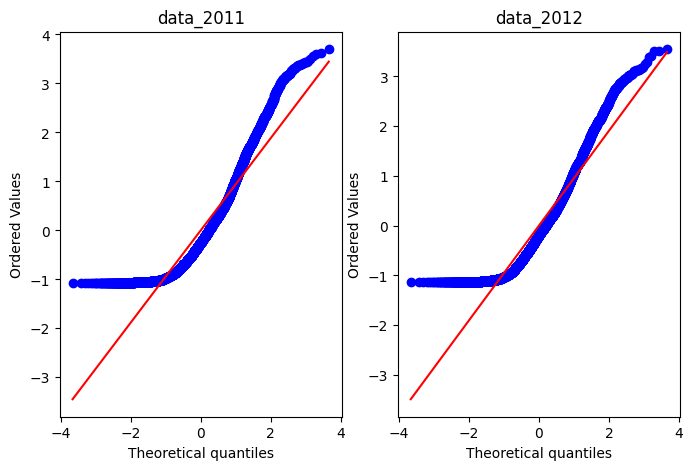

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
stats.probplot((data_2011['count']-data_2011['count'].mean())/data_2011['count'].std(), dist="norm", plot=py)
plt.title("data_2011")

plt.subplot(1,2,2)
stats.probplot((data_2012['count']-data_2012['count'].mean())/data_2012['count'].std(), dist="norm", plot=py)
plt.title("data_2012")
py.show()

#### Insights: Distributions do not follow normal distribution

### Mann-Whitney U Test

In [ ]:
res = stats.mannwhitneyu(data_2011['count'],
                         data_2012['count'],
                         alternative='two-sided'
                        )
print(f"mann whitney test \n   1. test statistic: {res.statistic}\n   2. p value: {res.pvalue}")
test_statistic = res.statistic
p_value = res.pvalue
if p_value < alpha:
    print("we reject null hypothesis, distributions are not same")
else:
    print("we accept null hypothesis, distribution are same")
print("=="*100)

mann whitney test 
   1. test statistic: 11038930.0
   2. p value: 2.688188065648264e-114
we reject null hypothesis, distributions are not same


#### Insights: Rentals increased in 2012 compared to 2011

## Hypothesis 6: Are rental counts are different during may-aug months?

**Ho: Rentals are not different** <br>
**Ha: Rentals are same**

In [ ]:
may_aug_data = yulu_data[yulu_data['month'].isin([5,6,7,8])].copy().reset_index(drop=True)
rest_year_data = yulu_data[~yulu_data['month'].isin([5,6,7,8])].copy().reset_index(drop=True)

print(may_aug_data.shape)
print(rest_year_data.shape)

(3648, 18)
(7216, 18)


In [ ]:
may_aug_data['count'].mean(), rest_year_data['count'].mean()

(232.73382675438597, 171.26385809312637)

### QQ plots

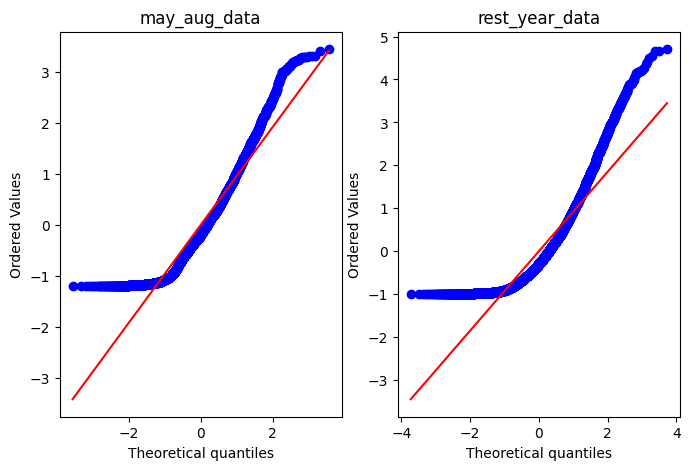

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
stats.probplot((may_aug_data['count']-may_aug_data['count'].mean())/may_aug_data['count'].std(), dist="norm", plot=py)
plt.title("may_aug_data")

plt.subplot(1,2,2)
stats.probplot((rest_year_data['count']-rest_year_data['count'].mean())/rest_year_data['count'].std(), dist="norm", plot=py)
plt.title("rest_year_data")
py.show()

#### Insights: Distributions do not follow normal distribution

### Mann-Whitney U Test

In [ ]:
res = stats.mannwhitneyu(may_aug_data['count'],
                         rest_year_data['count'],
                         alternative='two-sided'
                        )
print(f"mann whitney test \n   1. test statistic: {res.statistic}\n   2. p value: {res.pvalue}")
test_statistic = res.statistic
p_value = res.pvalue
if p_value < alpha:
    print("we reject null hypothesis, distributions are not same")
else:
    print("we accept null hypothesis, distribution are same")
print("=="*100)

mann whitney test 
   1. test statistic: 15815103.5
   2. p value: 3.4110287438067357e-66
we reject null hypothesis, distributions are not same


#### Insights: Rentals are higher(different) during the May-Aug period